# Algorytmika i matematyka uczenia maszynowego 
## Laboratorium 9


### Zadanie 1

1. Wczytaj plik `mieszkania.csv`, np. za pomocą:
    - biblioteki [`pandas`](https://pandas.pydata.org/docs/reference/api/pandas.read_csv.html) (`read_csv`),
    - biblioteki [`numpy`](https://numpy.org/doc/stable/reference/generated/numpy.genfromtxt.html) (`genfromtxt`),
    - biblioteki [`csv`](https://docs.python.org/3/library/csv.html) (`reader`).
1. Usuń nieprawidłowe dane np. wiersz zawierający wartość `-` lub wartość $0$ powinien zostać usunięty.
1. Zamień wartości liczbowe w formacie tekstowym na typ liczbowy.
1. Wyświetl **funkcję masy prawdopodobieństwa** wartości mieszkania dla różnych rodzajów "transakcji rynkowych". Podpowiedź: możesz skożystać z funkcji `displot` z modułu `seaborn` (jeżeli nie posiadasz to możesz zainstalować za pomocą `pip install seaborn`).
1. Wyświetl wszystkie trzy powyższe funkcje (dla ogółu, rynku pierwotnego i wtórnego) na jednym wykresie.
1. Opisz wyniki.

_Informacja odnośnie zbioru danych:_

- _Prezentowane dane dotyczące wielkości sprzedaży oraz cen nieruchomości zostały pobrane z GUSu i opracowane na podstawie informacji pozyskanych z Rejestru Cen Nieruchomości (RCN) – do 31 lipca Rejestru Cen i Wartości Nieruchomości (RCiWN) –  prowadzonego przez starostwa powiatowe i prezydentów miast na prawach powiatu przy wykorzystaniu informacji pochodzących z aktów notarialnych. Obserwacji podlegają tylko te transakcje kupna/sprzedaży nieruchomości, które zostały zawarte w trakcie badanego okresu oraz zostały zarejestrowane w RCN przed datą przekazania wyciągu z rejestru do Głównego Urzędu Statystycznego. Prezentowane są dane dla lokali mieszkalnych znajdujących się w budynkach wielorodzinnych (potocznie mieszkania w blokach), bez informacji o domach jednorodzinnych._
- _Prezentowane dane dotyczą sprzedaży o charakterze rynkowym tj. sprzedaży na wolnym rynku (z pewnymi wyłączeniami, np. sprzedaży między stronami spokrewnionymi) oraz sprzedaży przetargowej. W przypadku braku odpowiedniej informacji w zbiorach pochodzących z RCN (do 31 lipca 2021 r. – RCiWN), podział na rynek pierwotny i wtórny został przeprowadzony przyjmując założenie, że sprzedaż na rynku pierwotnym dotyczy transakcji dokonywanych na wolnym rynku, gdzie stroną sprzedającą jest osoba prawna i średnia cena za 1 m2 powierzchni użytkowej lokalu wynosi co najmniej 2 000 zł. Do transakcji na rynku wtórnym zaliczono pozostałe transakcje rynkowe przeprowadzone na wolnym rynku oraz sprzedaż przetargową. W grudniu 2021 r. zasilono BDL danymi ostatecznymi za lata 2010-2014, które dotyczą większej liczby transakcji kupna-sprzedaży lokali mieszkalnych w porównaniu do danych wcześniej opublikowanych przez GUS. Od roku 2020 brak danych dla miasta Koszalin oraz niekompletne dane dla miasta Szczecin._
- _Mediana cen za 1 m2 lokali mieszkalnych sprzedanych w ramach transakcji rynkowych_
- _Data ostatniej aktualizacji:	16.12.2021_
- Przypisy:	
  - `-` oznacza brak informacji z powodu: zmiany poziomu prezentacji, zmian wprowadzonych do wykazu jednostek terytorialnych lub modyfikacji listy cech w danym okresie sprawozdawczym; 
  - `n` - Dana jeszcze niedostępna, będzie dostępna; 
  - `x` - Brak informacji, konieczność zachowania tajemnicy statystycznej lub wypełnienie pozycji jest niemożliwe albo niecelowe; 
  - `X` - Zmiany metodologiczne, brak informacji, konieczność zachowania tajemnicy statystycznej lub wypełnienie pozycji jest niemożliwe albo niecelowe
  

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

mieszkania = pd.read_csv('mieszkania.csv',sep=";")  
mieszkaniaColumns = mieszkania.columns

for column in mieszkaniaColumns:
    if column == "Kod":
        mieszkania.drop(mieszkania.index[mieszkania[column] == '-'], inplace=True)
    else:
        mieszkania.drop(mieszkania.index[mieszkania[column] == '-'], inplace=True)
        mieszkania.drop(mieszkania.index[mieszkania[column] == '0'], inplace=True)
        
mieszkania

,Kod,Nazwa,Transakcje rynkowe,Powierzchnia użytkowa lokali mieszkalnych,Rok,Wartosc,Jednostka miary,Atrybut
0,0,POLSKA,ogółem,ogółem,2010,4045,zł,
1,0,POLSKA,ogółem,ogółem,2011,4095,zł,
2,0,POLSKA,ogółem,ogółem,2012,3976,zł,
3,0,POLSKA,ogółem,ogółem,2013,4023,zł,
4,0,POLSKA,ogółem,ogółem,2014,4029,zł,
...,...,...,...,...,...,...,...,...
71454,3263000,Powiat m.Świnoujście,rynek wtórny,"od 80,1 m2",2016,4346,zł,
71455,3263000,Powiat m.Świnoujście,rynek wtórny,"od 80,1 m2",2017,4960,zł,
71456,3263000,Powiat m.Świnoujście,rynek wtórny,"od 80,1 m2",2018,5562,zł,
71457,3263000,Powiat m.Świnoujście,rynek wtórny,"od 80,1 m2",2019,6488,zł,


In [2]:
mieszkania['Wartosc'] = mieszkania['Wartosc'].astype(int)
transakcjeRynkowe = mieszkania['Transakcje rynkowe'].unique()

In [3]:
transakcjeRynkowe

array(['ogółem', 'rynek pierwotny', 'rynek wtórny'], dtype=object)

c:\users\weap\appdata\local\programs\python\python37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
c:\users\weap\appdata\local\programs\python\python37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
c:\users\weap\appdata\local\programs\python\python37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `di

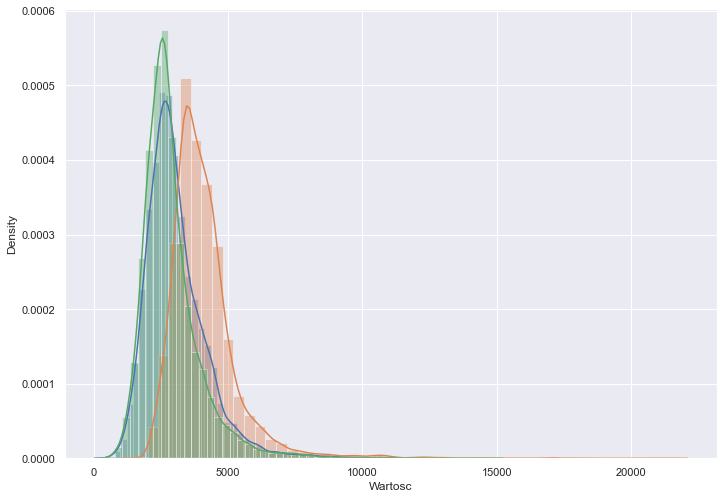

In [4]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
for i in transakcjeRynkowe:
    sns.distplot(mieszkania.loc[mieszkania['Transakcje rynkowe'] == i]['Wartosc'], label=i)

<AxesSubplot:xlabel='Wartosc', ylabel='Density'>

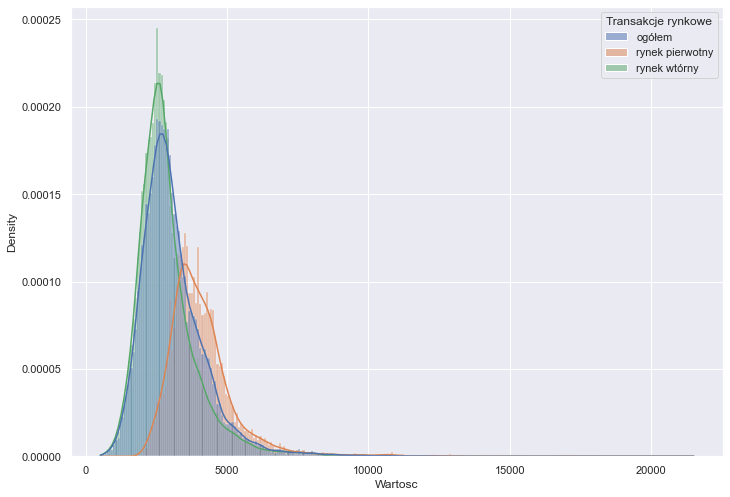

In [5]:
sns.histplot(data = mieszkania,x='Wartosc', hue= 'Transakcje rynkowe',kde=True, stat='density')

Dla rynku ogólnego i wtórnego cena mieszkań wynosiła około 2,5k natomiast pierwotnego była droższa i wynosiła 4k

### Zadanie 2 (kontynuacja poprzedniego)
1. Wyświetl dystrybuantę (funkcja `ecdfplot`) wartości mieszkań dla rodzaju transakcji `ogólny`.
1. Odczytaj "na oko" z wykresu ile % mieszkań sprzedaje się za cenę poniżej 4 tys. zł.

<AxesSubplot:xlabel='Wartosc', ylabel='Proportion'>

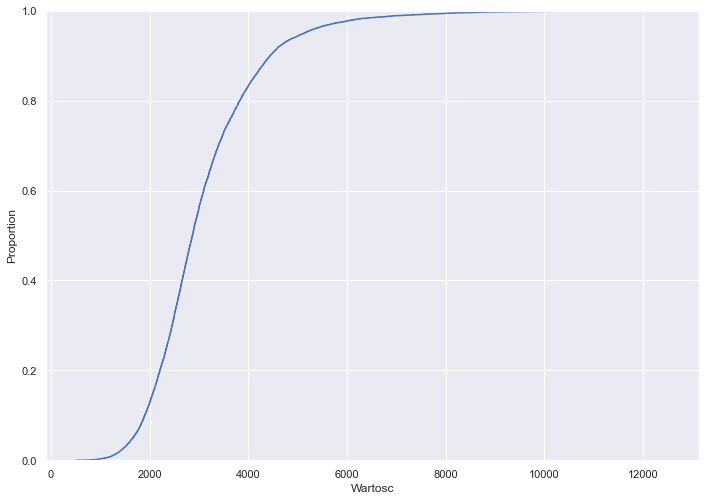

In [6]:
sns.ecdfplot(data=mieszkania, x=mieszkania.loc[mieszkania['Transakcje rynkowe'] == 'ogółem']['Wartosc'])

Poniżej 4k sprzedaje sie 80% mieszkań

### Zadanie 3

Opis zbioru danych znajduje się w pliku z danymi.

1. Wczytaj plik `boston.txt` (zwróć uwagę na format pliku), bez ręcznej edycji tego pliku.
> Podpowiedź: możesz użyć funkcji `read_csv` z parametrami `skiprows`, `header`, `sep`.
1. Wyświetl funkcję masy prawdopodobieństwa dla ceny mieszkań.
1. Wyświetl funkcję masy prawdopodobieństwa dla dwóch zmiennych (`x` i `y`): `MEDV`, `RM`. W jakiej cenie i liczbie pokoi sprzedaje się najwięcej mieszkań? Co jeszcze można odczytać z wykresu?
1. Sprawdź jeszcze jeden dowolny atrybut i opisz wyniki.


In [7]:
dfBostonFile = pd.read_csv('boston.txt', skiprows = 21, header=None, delim_whitespace=True)
dfBostonSecond = dfBostonFile[dfBostonFile.index % 2 == 1].iloc[:,:3].reset_index(drop=True)
dfBostonFirst = dfBostonFile.iloc[::2, :].reset_index(drop=True)
dfBoston = pd.concat([dfBostonFirst, dfBostonSecond], axis=1)
dfBoston.columns = ['CRIM','ZN','INDUS','CHAS','NOX','RM','AGE','DIS','RAD','TAX','PTRATIO','B','LSTAT','MEDV']
dfBoston

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48,22.0


<AxesSubplot:xlabel='MEDV', ylabel='Density'>

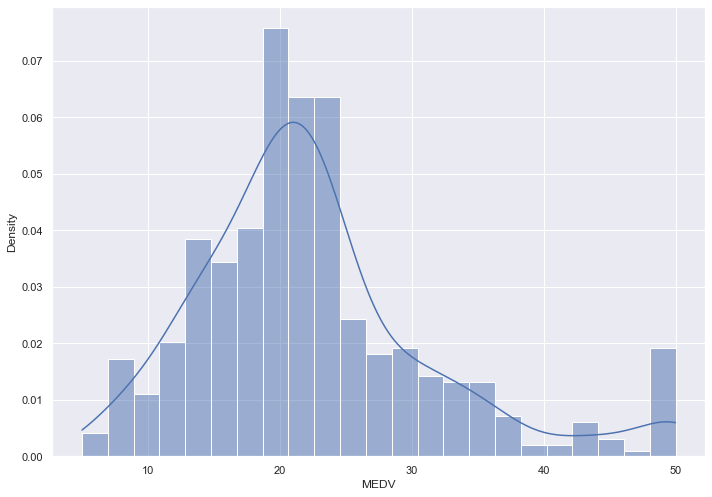

In [8]:
sns.histplot(data = dfBoston,x='MEDV',kde=True, stat='density')

<AxesSubplot:xlabel='MEDV', ylabel='RM'>

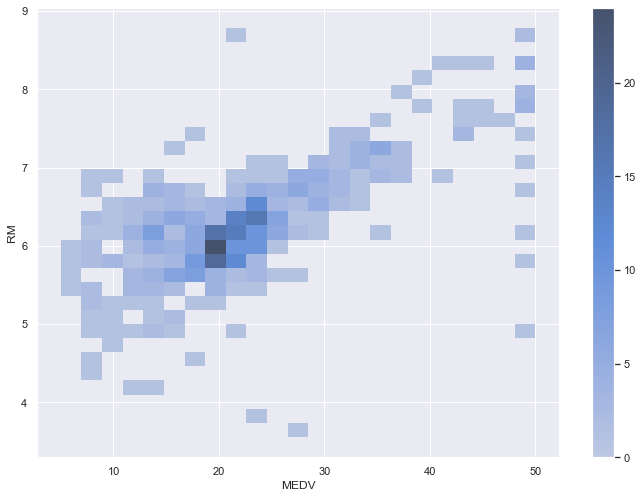

In [20]:
# sns.histplot(data = dfBoston,x='MEDV',y='RM',kde=True, stat='density')
sns.histplot(data = dfBoston, x='MEDV', y='RM', cbar=True, stat='count')

<AxesSubplot:xlabel='DIS', ylabel='RAD'>

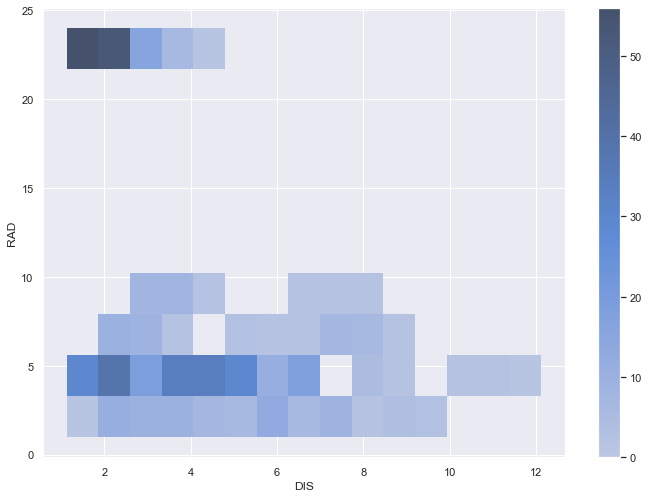

In [29]:
sns.histplot(data = dfBoston, x='DIS', y='RAD', cbar=True, stat='count')